# FIAP - Pós Tech IA para Devs
## Desafio Aula Inagural : Previsão de evasão escolar
### Professora: Poliana Ferreira 
Atividade prática de classificação, cujo objetivo é desenvolver um modelo capazes de identificar se um aluno tem maior chance de abandonar os estudos (Dropout) ou de se formar (Graduate). Você deve ter acurácia >= 90% e recall do dropout >=e 80% 

Vocês devem seguir os passos nos comentários desse notebook. Lembrem-se, vocês podem adicionar coisas, mas não podem tirar! :) 

Base de dados: https://github.com/pnferreira/fiap-ia-devs/blob/main/dropout-inaugural.csv

Target: "Dropout" ou "Graduate"


In [ ]:
# importar as bibliotecas necessárias - pandas, sklearn, matplotlib, seaborn
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [3]:
# importar a base de dados
base = pd.read_csv('dropout-inaugural.csv') 

In [4]:
# visualizar as primeiras linhas da base de dados
base.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8,5,2.0,1,1,1,13.0,10.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,6,1,11.0,1,1,1,1.0,3.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,5.0,1,1,1,22.0,27.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,8,2,15.0,1,1,1,23.0,27.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,12,1,3.0,0,1,1,22.0,28.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [5]:
# visualizar as informações da base de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3635 entries, 0 to 3634
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  3630 non-null   float64
 1   Application mode                                3635 non-null   int64  
 2   Application order                               3635 non-null   int64  
 3   Course                                          3629 non-null   float64
 4   Daytime/evening attendance                      3635 non-null   int64  
 5   Previous qualification                          3635 non-null   int64  
 6   Nacionality                                     3635 non-null   int64  
 7   Mother's qualification                          3632 non-null   float64
 8   Father's qualification                          3628 non-null   float64
 9   Mother's occupation                      

In [7]:
# ver os valores da coluna Target - que queremos prever
targets = base['Target'].values
targets

array(['Dropout', 'Graduate', 'Dropout', ..., 'Graduate', 'Graduate',
       'Dropout'], dtype=object)

In [15]:
# tratar dados nulos
base.fillna(base.median(numeric_only=True), inplace=True) # trata os valores nulos com a mediana dos valores de cada coluna respectiva.

# tratar dados duplicados
base.drop_duplicates(inplace=True)


# outras formas de pré-processamento (OPCIONAL - ex.: seleção de características, normalização, tratamento de outliers, balanceamento do target...)
# pode ser nessa célula ou nas seguintes, a depender do que você escolher fazer


base

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1.0,8,5,2.0,1,1,1,13.0,10.0,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1.0,6,1,11.0,1,1,1,1.0,3.0,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1.0,1,5,5.0,1,1,1,22.0,27.0,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1.0,8,2,15.0,1,1,1,23.0,27.0,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2.0,12,1,3.0,0,1,1,22.0,28.0,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3625,1.0,1,6,15.0,1,1,1,1.0,1.0,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
3626,1.0,1,2,15.0,1,1,19,1.0,1.0,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
3627,1.0,1,1,12.0,1,1,1,22.0,27.0,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
3628,1.0,1,1,9.0,1,1,1,22.0,27.0,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


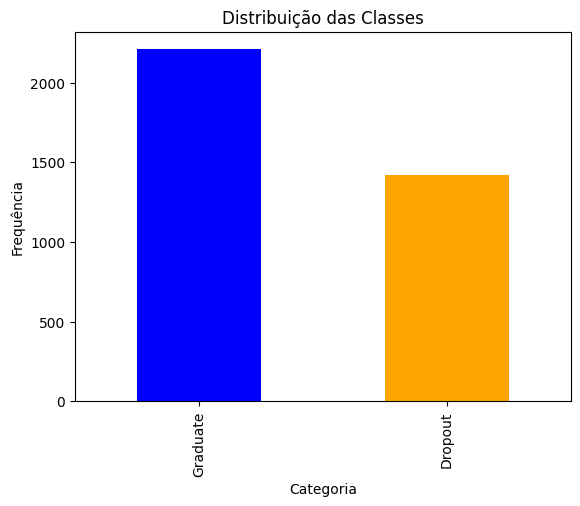

In [16]:
# análise exploratória: crie uma pergunta sobre a base de dados e responda através de um gráfico
base['Target'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.title("Distribuição das Classes")
plt.xlabel("Categoria")
plt.ylabel("Frequência")
plt.show()

In [22]:
# divisão entre caracterísiticas (X) e rótulo (y)
y = base['Target']
X = base.drop('Target', axis=1)

In [23]:
# divisão entre treino e teste - 70% e 30%
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size=0.3, random_state=1)

In [25]:
# treinamento de modelo de classificação a sua escolha (um ou mais)
modelo = RandomForestClassifier(n_estimators=100, max_depth=18, max_leaf_nodes=12)
modelo.fit(X_treinamento, y_treinamento)

RandomForestClassifier(max_depth=18, max_leaf_nodes=12)

In [28]:
# avaliação do modelo com dados de teste 
#(para ser considerado resultado satisfatório, você deve alcançar no mínimo 90% de acurácia e 80% de recall do Dropout)
previsoes = modelo.predict(X_teste) # Previsões do modelo
accuracy = accuracy_score(y_teste, previsoes)
precision = precision_score(y_teste, previsoes, average='weighted')
recall = recall_score(y_teste, previsoes, average='weighted')
f1 = f1_score(y_teste, previsoes, average='weighted')
report = classification_report(y_teste, previsoes)
print('Acurácia: ', accuracy)
print('Precisão: ', precision)
print('Recall: ', recall)
print('F1: ', f1)
print(report)

Acurácia:  0.90633608815427
Precisão:  0.9067302127378289
Recall:  0.90633608815427
F1:  0.9055925083066058
              precision    recall  f1-score   support

     Dropout       0.91      0.84      0.88       431
    Graduate       0.90      0.95      0.92       658

    accuracy                           0.91      1089
   macro avg       0.91      0.90      0.90      1089
weighted avg       0.91      0.91      0.91      1089

